In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
from scipy import stats
import pingouin as pg

/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [57]:
df = pd.read_csv('df_results.csv')
print(f"The sample is composed by {df.shape[0]} diferent models")
print(f"DataFrame columns ({df.shape[1]}): ", list(df.columns[1:]))
df.set_index('Model', inplace=True)
df.head(5)

The sample is composed by 442 diferent models
DataFrame columns (19):  ['File', 'Model', 'Path', 'F1_Score_Media', 'F1_Score_Desviacion', 'Recall_Media', 'Recall_Desviacion', 'Precision_Media', 'Precision_Desviacion', 'Roc_Auc_Media', 'Roc_Auc_Desviacion', 'Confusion_Matrix_Media', 'Confusion_Matrix_Desviacion', 'config', 'kernel_widths', 'filters', 'dropouts', 'test_suite_thresholds']


,Unnamed: 0,File,Path,F1_Score_Media,F1_Score_Desviacion,Recall_Media,Recall_Desviacion,Precision_Media,Precision_Desviacion,Roc_Auc_Media,Roc_Auc_Desviacion,Confusion_Matrix_Media,Confusion_Matrix_Desviacion,config,kernel_widths,filters,dropouts,test_suite_thresholds
Model,,,,,,,,,,,,,,,,,,
model_config1_architecture_5conv_3dense_1,0,detailed_metrics.json,/home/aacastro/Alejandro/DQ_ACA_2024/A)/result...,0.904706,0.020584,0.924315,0.031048,0.887374,0.034605,0.934534,0.017095,"[[28.076751450245425, 7.621597501115572], [4.8...","[[2.7016636017587725, 2.639215629566634], [1.9...",config1,50_cte,16_cte,0.5_cte,"[0.6, 0.65, 0.7, 0.75, 0.8]"
model_config2_architecture_5conv_3dense_1,1,detailed_metrics.json,/home/aacastro/Alejandro/DQ_ACA_2024/A)/result...,0.903533,0.027243,0.902288,0.059111,0.908553,0.032508,0.940282,0.017012,"[[29.732262382864793, 5.966086568496206], [6.2...","[[2.904713227750578, 2.360089335237042], [3.80...",config2,50_cte,16_cte,0.3_cte,"[0.6, 0.65, 0.7, 0.75, 0.8]"
model_config3_architecture_5conv_3dense_1,2,detailed_metrics.json,/home/aacastro/Alejandro/DQ_ACA_2024/A)/result...,0.899654,0.047426,0.894649,0.090081,0.912627,0.032554,0.942381,0.017814,"[[30.017849174475682, 5.680499776885319], [6.8...","[[2.7651678174862115, 2.411687033153705], [6.0...",config3,50_cte,32_cte,0.5_cte,"[0.6, 0.65, 0.7, 0.75, 0.8]"
model_config4_architecture_5conv_3dense_1,3,detailed_metrics.json,/home/aacastro/Alejandro/DQ_ACA_2024/A)/result...,0.901727,0.031290,0.900571,0.067490,0.908002,0.038502,0.942426,0.017920,"[[29.65863453815261, 6.039714413208389], [6.39...","[[2.8637019183295664, 2.884831410936749], [4.3...",config4,50_cte,32_cte,0.3_cte,"[0.6, 0.65, 0.7, 0.75, 0.8]"
model_config5_architecture_5conv_3dense_1,4,detailed_metrics.json,/home/aacastro/Alejandro/DQ_ACA_2024/A)/result...,0.903717,0.030895,0.897538,0.062384,0.913592,0.023341,0.945683,0.014810,"[[30.16064257028112, 5.537706381079874], [6.56...","[[2.6367926717968544, 1.7240226019935716], [3....",config5,20_cte,16_cte,0.5_cte,"[0.6, 0.65, 0.7, 0.75, 0.8]"


# 1. Filters

In [4]:
# Número de observaciones por grupo
# ==============================================================================
df.groupby('filters').size()

filters
16_cte    223
32_cte    219
dtype: int64

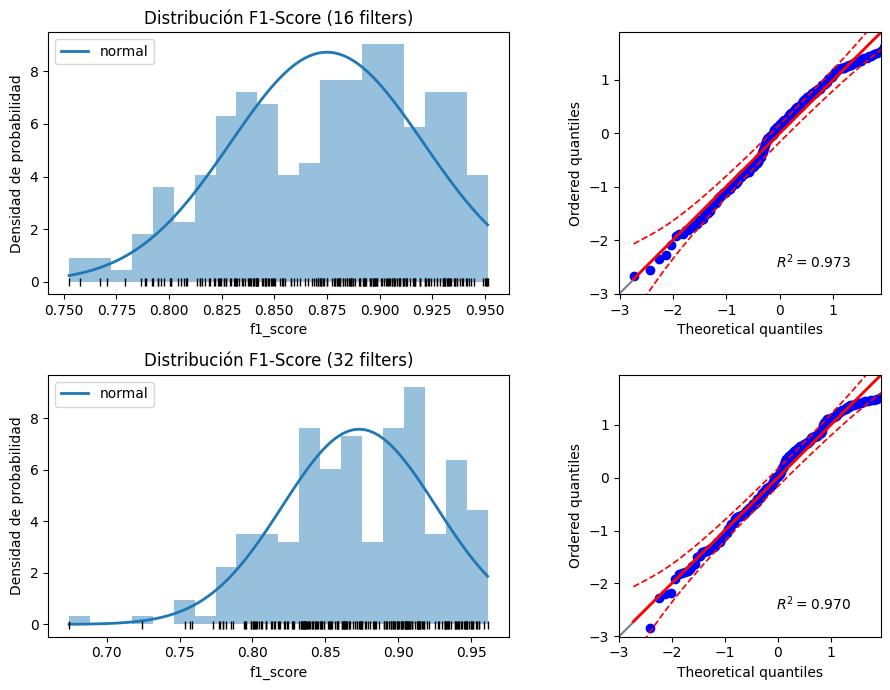

In [30]:
# Gráficos de distribución
# ==============================================================================
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

f1_score_16_filters = df.loc[df.filters == '16_cte', 'F1_Score_Media']
mu, sigma = stats.norm.fit(f1_score_16_filters)
x_hat = np.linspace(min(f1_score_16_filters), max(f1_score_16_filters), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

axs[0, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[0, 0].hist(x=f1_score_16_filters, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[0, 0].plot(f1_score_16_filters, np.full_like(f1_score_16_filters, -0.01), '|k', markeredgewidth=1)
axs[0, 0].set_title('Distribución F1-Score (16 filters)')
axs[0, 0].set_xlabel('f1_score')
axs[0, 0].set_ylabel('Densidad de probabilidad')
axs[0, 0].legend()

pg.qqplot(f1_score_16_filters, dist='norm', ax=axs[0, 1])

f1_score_32_filters = df.loc[df.filters == '32_cte', 'F1_Score_Media']
mu, sigma = stats.norm.fit(f1_score_32_filters)
x_hat = np.linspace(min(f1_score_32_filters), max(f1_score_32_filters), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axs[1, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[1, 0].hist(x=f1_score_32_filters, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[1, 0].plot(f1_score_32_filters, np.full_like(f1_score_32_filters, -0.01), '|k', markeredgewidth=1)
axs[1, 0].set_title('Distribución F1-Score (32 filters)')
axs[1, 0].set_xlabel('f1_score')
axs[1, 0].set_ylabel('Densidad de probabilidad')
axs[1, 0].legend()

pg.qqplot(f1_score_32_filters, dist='norm', ax=axs[1, 1])
plt.tight_layout();


In [6]:
# Test de normalidad Shapiro-Wilk
# ==============================================================================
pg.normality(data=df, dv='F1_Score_Media', group='filters')

,W,pval,normal
filters,,,
16_cte,0.970123,0.000118,False
32_cte,0.969591,0.000117,False


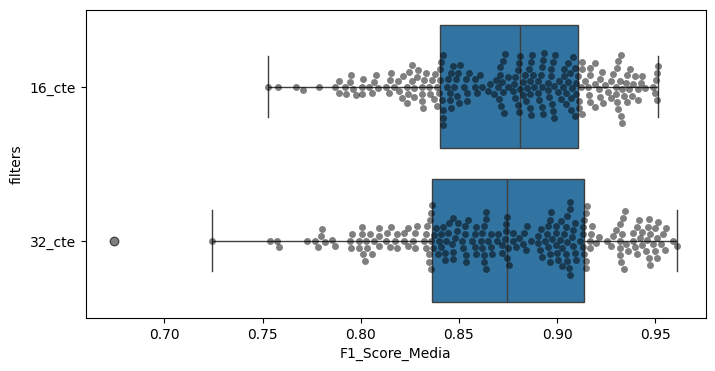

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(y="filters", x="F1_Score_Media", data=df, ax=ax)
sns.swarmplot(y="filters", x="F1_Score_Media", data=df, color='black', alpha = 0.5, ax=ax);

In [8]:
# Test de homocedasticidad
# ==============================================================================
pg.homoscedasticity(data=df, dv='F1_Score_Media', group='filters')

,W,pval,equal_var
levene,4.630115,0.031959,False


In [36]:
# Test para df independientes (p-value, intervalos de confianza)
# ==============================================================================
filters_16 = df.loc[df.filters == '16_cte', 'F1_Score_Media']
filters_32 = df.loc[df.filters == '32_cte', 'F1_Score_Media']

pg.ttest(x=filters_16, y=filters_32, alternative='two-sided', correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.367523,440,two-sided,0.713405,"[-0.01, 0.01]",0.034964,0.113,0.065544


# 2. Dropouts

In [10]:
# Número de observaciones por grupo
# ==============================================================================
df.groupby('dropouts').size()

dropouts
0.3_cte    220
0.5_cte    222
dtype: int64

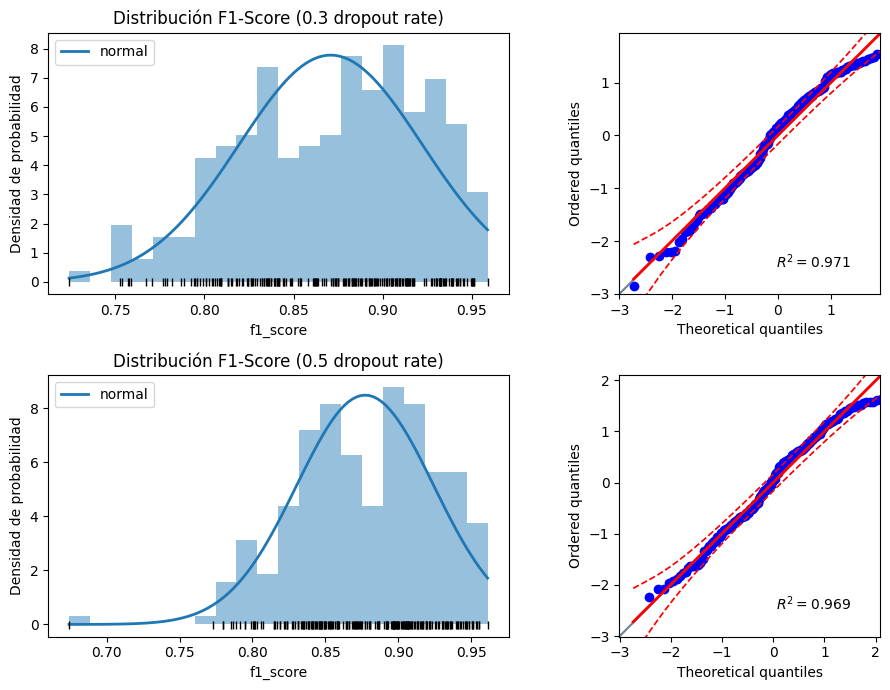

In [28]:
# Gráficos de distribución
# ==============================================================================
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

f1_score_dropout_0_3 = df.loc[df.dropouts == '0.3_cte', 'F1_Score_Media']
mu, sigma = stats.norm.fit(f1_score_dropout_0_3)
x_hat = np.linspace(min(f1_score_dropout_0_3), max(f1_score_dropout_0_3), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

axs[0, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[0, 0].hist(x=f1_score_dropout_0_3, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[0, 0].plot(f1_score_dropout_0_3, np.full_like(f1_score_dropout_0_3, -0.01), '|k', markeredgewidth=1)
axs[0, 0].set_title('Distribución F1-Score (0.3 dropout rate)')
axs[0, 0].set_xlabel('f1_score')
axs[0, 0].set_ylabel('Densidad de probabilidad')
axs[0, 0].legend()

pg.qqplot(f1_score_dropout_0_3, dist='norm', ax=axs[0, 1])

f1_score_dropout_0_5 = df.loc[df.dropouts == '0.5_cte', 'F1_Score_Media']
mu, sigma = stats.norm.fit(f1_score_dropout_0_5)
x_hat = np.linspace(min(f1_score_dropout_0_5), max(f1_score_dropout_0_5), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axs[1, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[1, 0].hist(x=f1_score_dropout_0_5, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[1, 0].plot(f1_score_dropout_0_5, np.full_like(f1_score_dropout_0_5, -0.01), '|k', markeredgewidth=1)
axs[1, 0].set_title('Distribución F1-Score (0.5 dropout rate)')
axs[1, 0].set_xlabel('f1_score')
axs[1, 0].set_ylabel('Densidad de probabilidad')
axs[1, 0].legend()

pg.qqplot(f1_score_dropout_0_5, dist='norm', ax=axs[1, 1])
plt.tight_layout();


In [12]:
# Test de normalidad Shapiro-Wilk
# ==============================================================================
pg.normality(data=df, dv='F1_Score_Media', group='dropouts')

,W,pval,normal
dropouts,,,
0.5_cte,0.969856,0.000113,False
0.3_cte,0.967808,0.000067,False


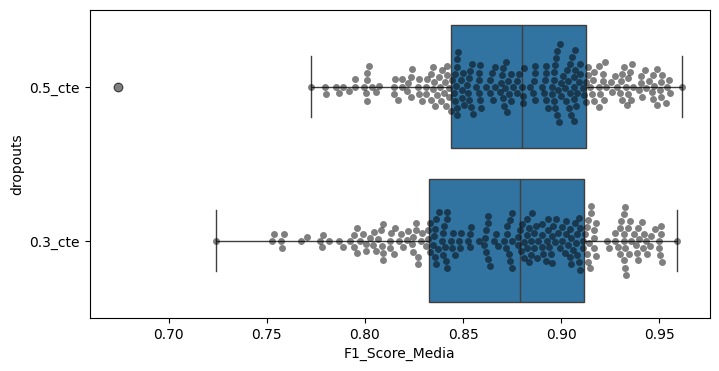

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(y="dropouts", x="F1_Score_Media", data=df, ax=ax)
sns.swarmplot(y="dropouts", x="F1_Score_Media", data=df, color='black', alpha = 0.5, ax=ax);

In [14]:
# Test de homocedasticidad
# ==============================================================================
pg.homoscedasticity(data=df, dv='F1_Score_Media', group='dropouts')

,W,pval,equal_var
levene,2.20428,0.138344,True


In [26]:
# Test para df independientes (p-value, intervalos de confianza)
# ==============================================================================
dropout_03 = df.loc[df.dropouts == '0.3_cte', 'F1_Score_Media']
dropout_05 = df.loc[df.dropouts == '0.5_cte', 'F1_Score_Media']

pg.ttest(x=dropout_03, y=dropout_05, alternative='two-sided', correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.388194,440,two-sided,0.16578,"[-0.02, 0.0]",0.132061,0.268,0.283125


# 3. Kernel Widths

In [16]:
# Número de observaciones por grupo
# ==============================================================================
df.groupby('kernel_widths').size()

kernel_widths
20_cte    92
50_cte    92
5_cte     90
ASC       88
DESC      80
dtype: int64

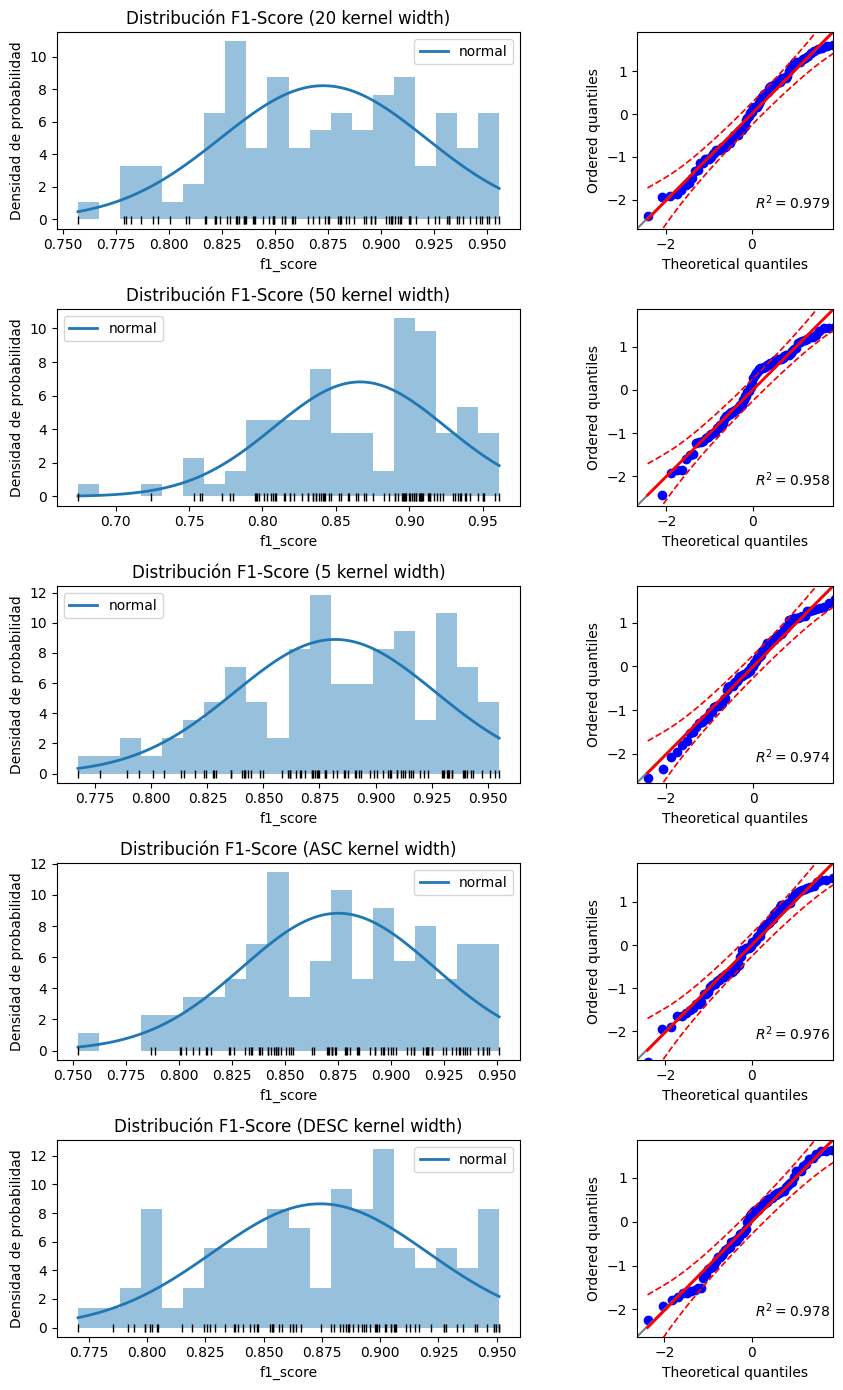

In [24]:
# Gráficos de distribución
# ==============================================================================
fig, axs = plt.subplots(5, 2, figsize=(10, 14))

f1_score_20_kernel = df.loc[df.kernel_widths == '20_cte', 'F1_Score_Media']
mu, sigma = stats.norm.fit(f1_score_20_kernel)
x_hat = np.linspace(min(f1_score_20_kernel), max(f1_score_20_kernel), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axs[0, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[0, 0].hist(x=f1_score_20_kernel, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[0, 0].plot(f1_score_20_kernel, np.full_like(f1_score_20_kernel, -0.01), '|k', markeredgewidth=1)
axs[0, 0].set_title('Distribución F1-Score (20 kernel width)')
axs[0, 0].set_xlabel('f1_score')
axs[0, 0].set_ylabel('Densidad de probabilidad')
axs[0, 0].legend()
pg.qqplot(f1_score_20_kernel, dist='norm', ax=axs[0, 1])

f1_score_50_kernel = df.loc[df.kernel_widths == '50_cte', 'F1_Score_Media']
mu, sigma = stats.norm.fit(f1_score_50_kernel)
x_hat = np.linspace(min(f1_score_50_kernel), max(f1_score_50_kernel), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axs[1, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[1, 0].hist(x=f1_score_50_kernel, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[1, 0].plot(f1_score_50_kernel, np.full_like(f1_score_50_kernel, -0.01), '|k', markeredgewidth=1)
axs[1, 0].set_title('Distribución F1-Score (50 kernel width)')
axs[1, 0].set_xlabel('f1_score')
axs[1, 0].set_ylabel('Densidad de probabilidad')
axs[1, 0].legend()
pg.qqplot(f1_score_50_kernel, dist='norm', ax=axs[1, 1])

f1_score_5_kernel = df.loc[df.kernel_widths == '5_cte', 'F1_Score_Media']
mu, sigma = stats.norm.fit(f1_score_5_kernel)
x_hat = np.linspace(min(f1_score_5_kernel), max(f1_score_5_kernel), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axs[2, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[2, 0].hist(x=f1_score_5_kernel, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[2, 0].plot(f1_score_5_kernel, np.full_like(f1_score_5_kernel, -0.01), '|k', markeredgewidth=1)
axs[2, 0].set_title('Distribución F1-Score (5 kernel width)')
axs[2, 0].set_xlabel('f1_score')
axs[2, 0].set_ylabel('Densidad de probabilidad')
axs[2, 0].legend()
pg.qqplot(f1_score_5_kernel, dist='norm', ax=axs[2, 1])

f1_score_asc_kernel = df.loc[df.kernel_widths == 'ASC', 'F1_Score_Media']
mu, sigma = stats.norm.fit(f1_score_asc_kernel)
x_hat = np.linspace(min(f1_score_asc_kernel), max(f1_score_asc_kernel), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axs[3, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[3, 0].hist(x=f1_score_asc_kernel, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[3, 0].plot(f1_score_asc_kernel, np.full_like(f1_score_asc_kernel, -0.01), '|k', markeredgewidth=1)
axs[3, 0].set_title('Distribución F1-Score (ASC kernel width)')
axs[3, 0].set_xlabel('f1_score')
axs[3, 0].set_ylabel('Densidad de probabilidad')
axs[3, 0].legend()
pg.qqplot(f1_score_asc_kernel, dist='norm', ax=axs[3, 1])

f1_score_desc_kernel = df.loc[df.kernel_widths == 'DESC', 'F1_Score_Media']
mu, sigma = stats.norm.fit(f1_score_desc_kernel)
x_hat = np.linspace(min(f1_score_desc_kernel), max(f1_score_desc_kernel), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axs[4, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[4, 0].hist(x=f1_score_desc_kernel, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[4, 0].plot(f1_score_desc_kernel, np.full_like(f1_score_desc_kernel, -0.01), '|k', markeredgewidth=1)
axs[4, 0].set_title('Distribución F1-Score (DESC kernel width)')
axs[4, 0].set_xlabel('f1_score')
axs[4, 0].set_ylabel('Densidad de probabilidad')
axs[4, 0].legend()
pg.qqplot(f1_score_desc_kernel, dist='norm', ax=axs[4, 1])

plt.tight_layout();


In [18]:
# Test de normalidad Shapiro-Wilk
# ==============================================================================
pg.normality(data=df, dv='F1_Score_Media', group='kernel_widths')

,W,pval,normal
kernel_widths,,,
50_cte,0.956951,0.004058,False
20_cte,0.972844,0.051575,True
5_cte,0.968739,0.028843,False
ASC,0.971406,0.048629,False
DESC,0.970765,0.063493,True


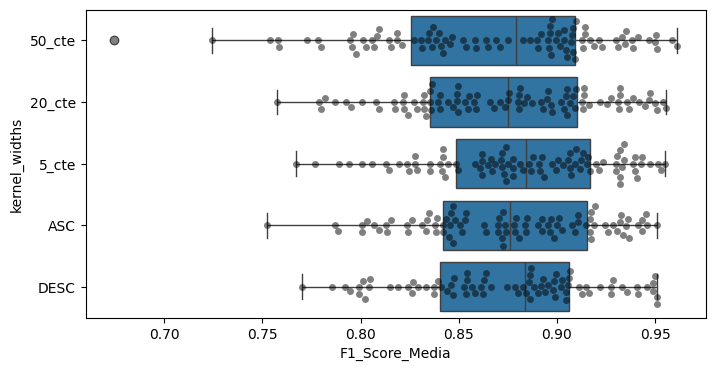

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(y="kernel_widths", x="F1_Score_Media", data=df, ax=ax)
sns.swarmplot(y="kernel_widths", x="F1_Score_Media", data=df, color='black', alpha = 0.5, ax=ax);

In [20]:
# Test de homocedasticidad
# ==============================================================================
pg.homoscedasticity(data=df, dv='F1_Score_Media', group='kernel_widths')

,W,pval,equal_var
levene,2.837029,0.024109,False


In [21]:
grupos = df['kernel_widths'].unique()

# Crear un DataFrame para almacenar los resultados
resultados_list = []

# Realizar pruebas t para cada combinación de grupos
for i in range(len(grupos)):
    for j in range(i + 1, len(grupos)):
        group1 = df.loc[df['kernel_widths'] == grupos[i], 'F1_Score_Media']
        group2 = df.loc[df['kernel_widths'] == grupos[j], 'F1_Score_Media']
        ttest_res = pg.ttest(x=group1, y=group2, alternative='two-sided', correction=False)
        resultados_list.append({
            'Group1': grupos[i],
            'Group2': grupos[j],
            'T-statistic': np.abs(ttest_res['T'][0]),
            'p-value': ttest_res['p-val'][0]
        })

/tmp/ipykernel_1183484/2185829184.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'T-statistic': np.abs(ttest_res['T'][0]),
/tmp/ipykernel_1183484/2185829184.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'p-value': ttest_res['p-val'][0]
/tmp/ipykernel_1183484/2185829184.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'T-statistic': np.abs(ttest_res['T'][0]),
/tmp/ipykernel_1183484/2185829184.py:16: FutureWarning: Se

In [22]:
# Convertir la lista de resultados a un DataFrame
resultados = pd.DataFrame(resultados_list)

print(resultados)

   Group1  Group2  T-statistic   p-value
0  50_cte  20_cte     0.773393  0.440293
1  50_cte   5_cte     1.978267  0.049424
2  50_cte     ASC     1.084496  0.279612
3  50_cte    DESC     0.946527  0.345223
4  20_cte   5_cte     1.326034  0.186509
5  20_cte     ASC     0.336238  0.737087
6  20_cte    DESC     0.215552  0.829596
7   5_cte     ASC     1.012325  0.312772
8   5_cte    DESC     1.090528  0.277042
9     ASC    DESC     0.111790  0.911125
